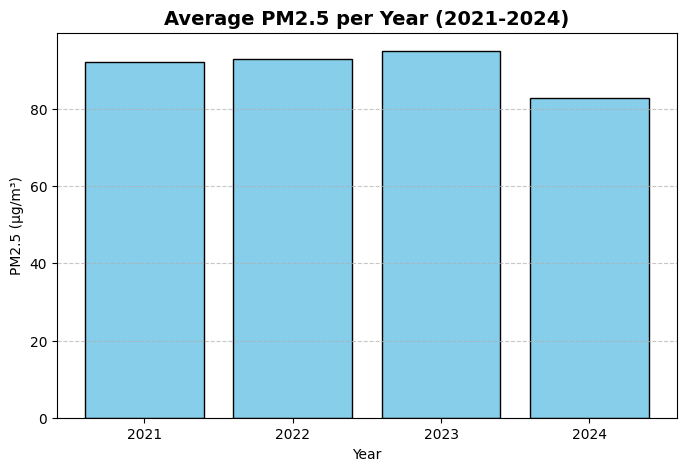

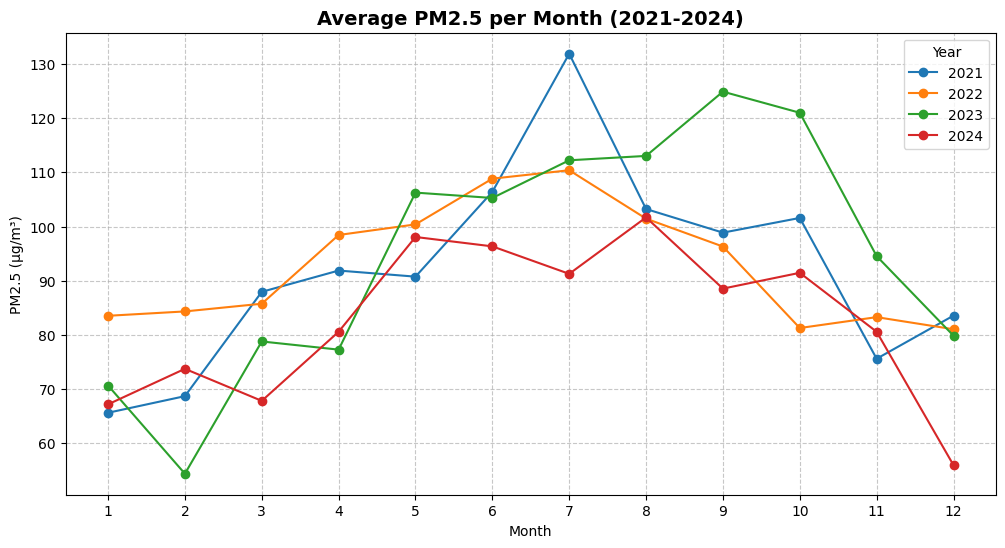

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV (adjust path if needed)
df = pd.read_csv("D:/Downloads/VisualQuest2025_CSV-Warriors/dataset/PM25_Consentration_In_Jakarta-20250831T121137Z-1-001/PM25_Consentration_In_Jakarta/ispu_dki_all.csv")

# Convert 'tanggal' to datetime
df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')

# Filter rows for 2021–2024
df = df[(df['tanggal'].dt.year >= 2021) & (df['tanggal'].dt.year <= 2024)]

# Extract year and month
df['year'] = df['tanggal'].dt.year
df['month'] = df['tanggal'].dt.month

# Convert pm25 to numeric
df['pm25'] = pd.to_numeric(df['pm25'], errors='coerce')

# Group by year and month
monthly_avg = df.groupby(['year', 'month'])['pm25'].mean().reset_index()

# Yearly average
yearly_avg = df.groupby('year')['pm25'].mean().reset_index()

# --- Visualization ---

# 1. Yearly average bar chart
plt.figure(figsize=(8,5))
plt.bar(yearly_avg['year'], yearly_avg['pm25'], color="skyblue", edgecolor="black")
plt.title("Average PM2.5 per Year (2021-2024)", fontsize=14, weight="bold")
plt.xticks(yearly_avg['year'])
plt.xlabel("Year")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Monthly average line chart
plt.figure(figsize=(12,6))
for year in monthly_avg['year'].unique():
    subset = monthly_avg[monthly_avg['year'] == year]
    plt.plot(subset['month'], subset['pm25'], marker='o', label=str(year))

plt.title("Average PM2.5 per Month (2021-2024)", fontsize=14, weight="bold")
plt.xlabel("Month")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(range(1,13))
plt.legend(title="Year")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
